# OK, so: $ \zeta(s) = \sum_{n=1}^{\infty} \frac{1}{n^s}$ 


### which is actually: $ \zeta(s) = \frac{1}{1^s} +\frac{1}{2^s} + \frac{1}{3^s}... $ 

### Now from Chapter 2, we know $ \zeta(2) = \frac{\pi^2}{6}$
### Here's a couple of others

### $ \zeta(3) = 1.202....$
### $ \zeta(4) = \frac{\pi^4}{90}$


### The problem is .... negative numbers again...
### So we know from Chapter 11 that negative numbers can be square rooted to imaginary numbers. Well what happens if we chart the above values

In [1]:
import math

def zeta(x):
    sum_ = 0
    init_val = 0
    while True:
        init_val += 1
        sum_new = sum_ + (1 / init_val**x)
        if round(sum_,10) == round(sum_new,10):
            return sum_new
        else:
            sum_ = sum_new

round((math.pi**2) / zeta(2),4)

6.0

In [2]:
import matplotlib.pyplot as plt

x_coordinates = [2, 3, 4]
y_coordinates = [zeta(x) for x in x_coordinates]

plt.scatter(x_coordinates, y_coordinates)

plt.show()

<Figure size 640x480 with 1 Axes>

### Well, as you can see, that's approaching one... In fact let's do another 1000 data points

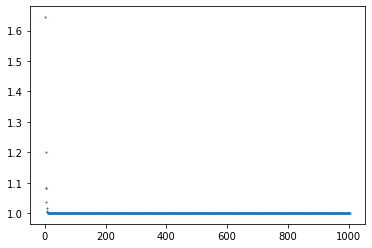

In [3]:
import matplotlib.pyplot as plt

x_coordinates = [2, 3, 4] + list(range(4,1004+1))
y_coordinates = [zeta(x) for x in x_coordinates]

plt.scatter(x_coordinates, y_coordinates,s=1)

plt.show()

### Basically a flatline at y = 1. But what about negative numbers.

# $ \zeta(-1) = \sum_{n=1}^{\infty} \frac{1}{n^{-1}} = \frac{1}{1^{-1}} +\frac{1}{2^{-1}} + \frac{1}{3^{-1}}... = \frac{-1}{12} $

#### Well thinking about this for just 30 seconds should make you go wtf....

$\frac{1}{1^{-1}} = 1, \frac{1}{2^{-1}} = 2,  \frac{1}{3^{-1}} = 3 $


### But 1 + 2 +  3 + 4 + ... won't converge to anything.... Although, if anyone knows where I can get $1 + 2 + 3 + 4... = -\frac{1}{12} $ on a t-shirt, let me know.

### And maths being maths, that's not all. What if we were to take this a further step by using those beautiful imaginary numbers?

### Well... 

$x^m  \times x^n = x^{m+n} $

$(\frac{1}{2})^{2+i} \equiv (\frac{1}{2})^{2} \times (\frac{1}{2})^{i}$

Well that first bit is easy...

In [4]:
.5**2

0.25

#### The second bit?


$ (\frac{1}{2})^{i} = 0.769238901 - 0.638961276 i$

Yeah, not so great.

$e^{\pi i} = 1 + 3.141592654i...$

I wonder... given we know $(x^m)^n = x^{m  \times  n} $


$(e^{\pi})^{i} = 1 + 3.141592654i...$

In [5]:
import math

math.e ** math.pi

23.140692632779263

Oh wait, hold on...

$(e^{\pi})^{i} = -1$

$1^{i} = \frac{-1}{e^{\pi}}$

$(\frac{1}{2})^{i} = \frac{-1}{e^{\pi}} \div 2$

In [6]:
-1 / (math.e ** math.pi) / 2

-0.02160695913188613

$(e^{\pi})^{i} = = 1 + 3.141592654i$

$1^{i} = \frac{1 + 3.141592654i}{e^{\pi}}$

$(\frac{1}{2})^{i} = \frac{1 + 3.141592654i}{e^{\pi}} \div 2$

In [7]:
1 / ((math.e ** math.pi) / 2)

0.08642783652754452

## Nah not that.

Ah! I know...

$ 𝑒^{𝑖𝜃} = cos𝜃 + (𝑖 \times sin𝜃) \equiv \theta^{𝑖} = 𝑒^{𝑖 ln \theta} = cos(ln \theta)+𝑖sin(ln \theta)$

OK, so

$(\frac{1}{2})^{𝑖} = 𝑒^{𝑖 ln (\frac{1}{2})} = cos(ln (\frac{1}{2})) + 𝑖sin(ln (\frac{1}{2}))$

In [8]:
math.cos(math.log(1/2))

0.7692389013639721

In [9]:
math.sin(math.log(1/2))

-0.6389612763136348

### Let's try taking this a little further with the help of [Christian Peronne](https://blog.christianperone.com/2010/02/riemann-zeta-function-visualizations-with-python/#comments).

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

del zeta
from mpmath import * #including for their zeta and zetazero

In [11]:
def calc_zeta(re, img_name=""):
    X,Y,Z = [], [], []

    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in np.arange(0.1, 50.0, 0.1):
        compl = zeta(complex(re, i))
        X.append(compl.real)
        Y.append(compl.imag)
        Z.append(i)

    ax.grid(True)
    ax.plot(Z,X, label='Imaginary numbers for (v)', lw=0.8)
    ax.plot(Z,Y, label='Real numbers for (v)', lw=0.8)
    ax.set_title("Riemann Zeta function - re(s)=%.3f" % re)
    ax.set_xlabel("Im(s)")
    ax.set_ylabel("Re(v) and Im(v)")

    leg = ax.legend(shadow=True)   
    for t in leg.get_texts():
        t.set_fontsize('small')

    for l in leg.get_lines():
        l.set_linewidth(2.0)

    # Plot the zeroes of zeta
    for i in range(1, 11):
        zero = zetazero(i)
        ax.plot(zero.imag, [0.0], "ro")

    # Comment this line for autoscale
    ax.set_ylim(12, -12)
#     plt.savefig(img_name)
    print("Plot %s !" % img_name)
    plt.show()

re_0 = np.arange(0.01, 10.0, 0.01)[0]
re_end = np.arange(0.01, 10.0, 0.01)[-1]

## Right so, what does that function mean. 

### Well a couple of things. Firstly it's attempting to map the each iteration of numbers, from `0.01` to `10` are `0.01` intervals. That complex function is there to map each number from those intervals with the "real" part we feed the values in.

In [12]:
complex

complex

In [13]:
complex(re_0, 0.01)

(0.01+0.01j)

In [14]:
complex(re_0, 10)

(0.01+10j)

## Now within there, you'll have had real and imaginary parts

In [15]:
complex(re_0, 0.01) , complex(re_0, 0.01).real, complex(re_0, 0.01).imag

((0.01+0.01j), 0.01, 0.01)

In [16]:
complex(re_0, 10), complex(re_0, 10).real, complex(re_0, 10).imag

((0.01+10j), 0.01, 10.0)

## And so we end up with 3 lists, one full of the real parts, one full of imaginary, and one full of ... well `Z` is full of the arguments we originally passed.

## Of course, we're using the zeta function on top of them. 

In [17]:
complex(re_0, 10), "->", zeta(complex(re_0, 10))

((0.01+10j), '->', mpc(real='1.7515717276082912', imag='-0.10208226796010143'))

## So what happens when we chart each of the imaginary values across each real and imaginary parts after applying the Zeta function

Plot  !


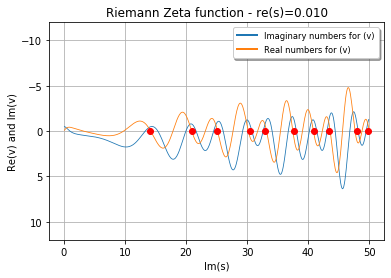

In [18]:
calc_zeta(re_0)

## What I hope you're able to see is the first 10 "non-trivial" zeroes from Riemann Zeta function are when the two series, the `Im(v)` and `Re(v)` cross each other on the red dot at the critical line. 
## `(Re(s) = 1/2)` is where lies the zeroes of the Zeta Function, note how the real and imaginary part turns away from each other as the Re(s) increases.

Plot  !


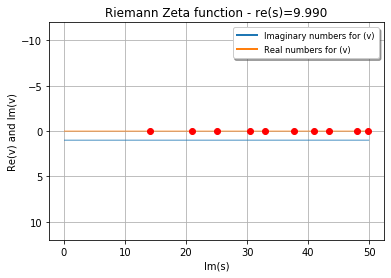

In [19]:
calc_zeta(re_end)

## Well that's all nice and handy. But what about the function itself. What if I keep plonking in number on the imaginary plane to see how many times the `Zeta` functions maps on to `0`.
Thanks to [Ilevksy](https://github.com/IlievskiV/Amusive-Blogging-N-Coding/blob/master/Visualizations/riemann_zeta_zeros.ipynb)

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


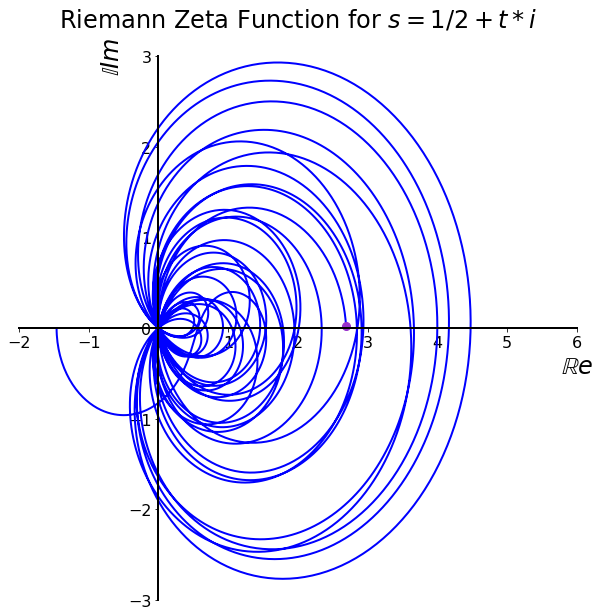

In [20]:
import matplotlib.animation as animation
import warnings


warnings.filterwarnings("ignore")  # ignore warnings
mp.dps = 10; mp.pretty = False


N = 10000 # the number of discrete steps
T = 100 # the number of continuous time steps
dt = 1.0 * T/N  # total number of time steps
t = linspace(0.0, N*dt, N+1)
z = [zeta(0.5 + tt*j) for tt in t]


re_z = np.array([float(z[i].real) for i in range(len(z))])  # parse the real part
im_z = np.array([float(z[i].imag) for i in range(len(z))])  # parse the imag part


fig = plt.figure(figsize=(10, 10))  # instantiate a figure
ax = plt.axes(xlim=(-2, 6), ylim=(-3, 3))  # create an axes object

line, = ax.plot([], [], lw=2, color='b')
point, = ax.plot([], [],  marker='o', markersize=8, color="#9932cc")

# formatting options
ax.set_title('Riemann Zeta Function for $s = 1/2 + t*i $', fontsize=24, pad=30)

ax.spines['left'].set_position('zero')
ax.spines['left'].set_linewidth(2.0)

ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_linewidth(2.0)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xlabel('$\mathbb{R}e$', fontsize=24, position= (1,-.5)) #, loc='right')
ax.set_ylabel('$\mathbb{I}Im$', fontsize=24, position= (-1,1)) #, loc='top')
ax.tick_params(labelsize=16)

# animation options
frames = 500
factor = N // frames

def animate(i):
    upper_bound = (i + 1)*factor  # up to what index to take the values
    re_z_i = re_z[:upper_bound]  # take the real 
    im_z_i = im_z[:upper_bound]
    
    line.set_data(list(re_z_i), list(im_z_i))
    point.set_data([re_z[upper_bound - 1]], [im_z[upper_bound - 1]])
    
    return line, point,

# call the animator	 
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=30, blit=True)
# save the animation
anim.save('riemann_zeta_zeros.gif', writer='PillowWriter')


## Right, but what does any of that mean? Well...

In [21]:
from IPython.display import HTML
HTML('<img src="riemann_zeta_zeros.gif">')

## You see all those times the above where the line cross `0,0`? Well that's ....

In [23]:
zetazero(1)

mpc(real='0.5', imag='14.13472514169')

In [26]:
zeta(zetazero(1))

mpc(real='5.791531808461e-12', imag='-3.637924944944e-11')

In [33]:
round(zeta(zetazero(1)).real
      ,10)

0.0

In [32]:
round(zeta(zetazero(1)).imag
      ,10)

-0.0

### Bit of a tricky one, but you can see from the `zetazero` function, each of these has a real part $\frac{1}{2}$, and it's those imaginary parts that are tricky.